In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
ad_multi = pd.read_csv("advertising.csv")

In [3]:
ad_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
ad_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
ad_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
ad_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


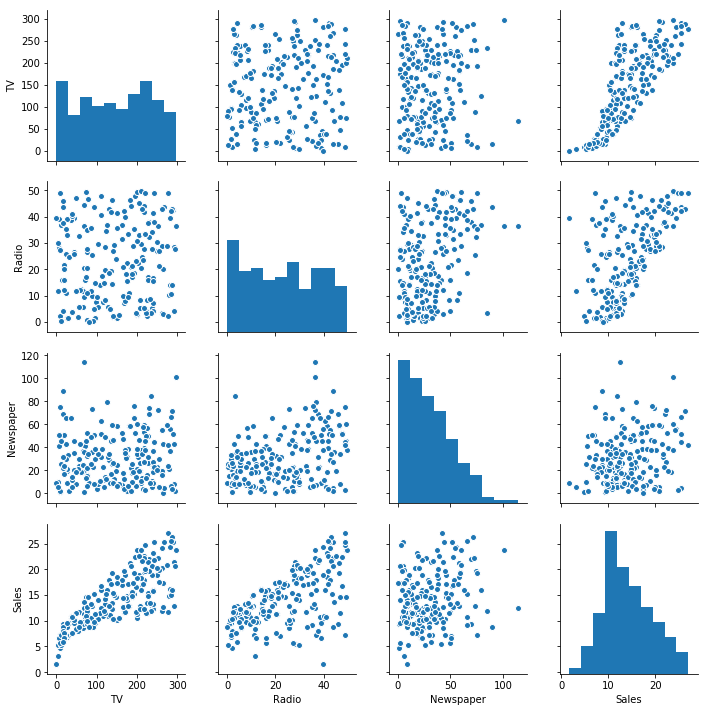

In [7]:
sns.pairplot(ad_multi)

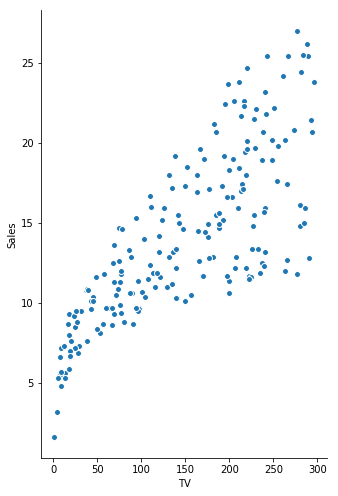

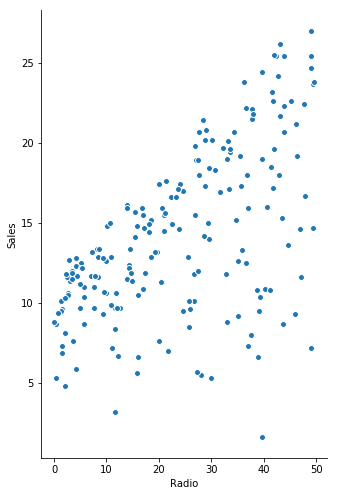

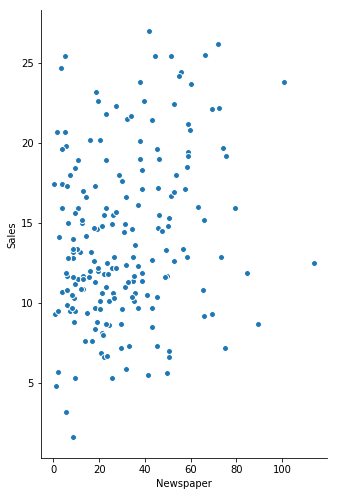

In [8]:
sns.pairplot(ad_multi, x_vars='TV', y_vars='Sales',size =7, aspect=0.7)
sns.pairplot(ad_multi, x_vars='Radio', y_vars='Sales',size =7, aspect=0.7)
sns.pairplot(ad_multi, x_vars="Newspaper", y_vars='Sales',size =7, aspect=0.7)

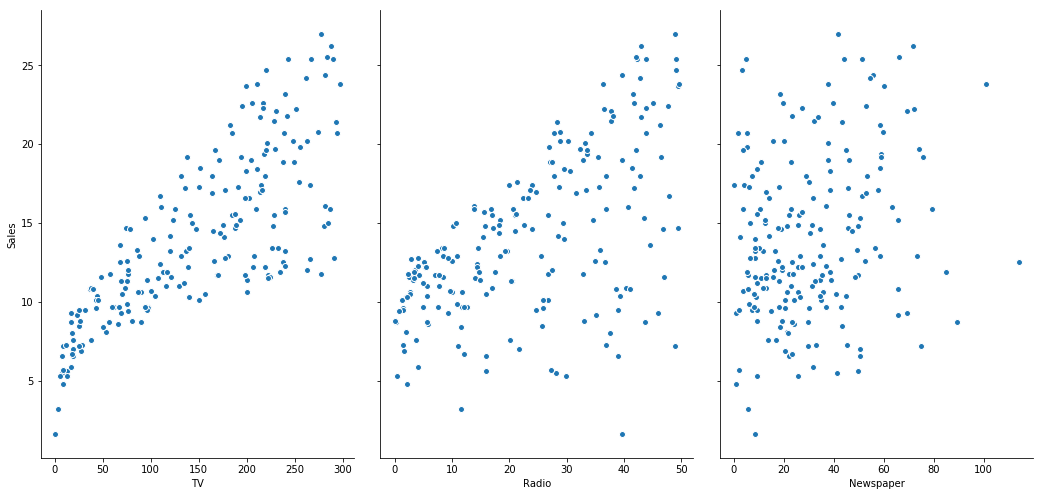

In [9]:
sns.pairplot(ad_multi, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

In [10]:
x=ad_multi[['TV','Radio','Newspaper']]

In [11]:
y=ad_multi['Sales']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression

In [15]:
print(x_train.shape)
print(y_train.shape)

(140, 3)
(140,)


In [16]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(lr.intercept_)
print(lr.coef_)

2.6527896688794943
[0.0454256  0.18975773 0.00460308]


In [18]:
coeff_df = pd.DataFrame(lr.coef_,x_test.columns,columns=['coefficient'])

In [19]:
coeff_df

,coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [20]:
y_pred = lr.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r2_squared = r2_score(y_test,y_pred)


In [22]:
print("mean squared error:",mse)
print("R squared error:",r2_squared)

mean squared error: 1.8506819941636972
R squared error: 0.9058622107532245


In [23]:
import statsmodels.api as sm
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)

lm_l = sm.OLS(y_train,x_train_sm).fit()
lm_l.params


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [24]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           9.97e-66
Time:                        16:58:28   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [25]:
c=[i for i in range(1,61,1)]

print(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


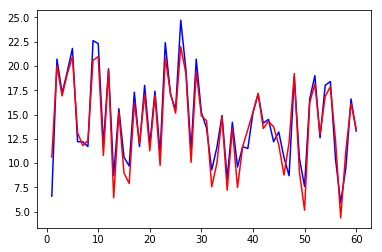

In [26]:

import matplotlib.pyplot as plt
plt.plot(c,y_test,color='blue')
plt.plot(c,y_pred,color='red')

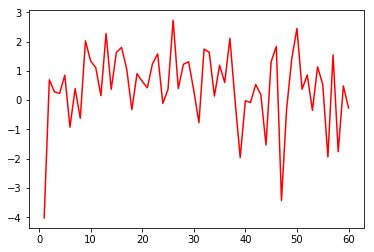

In [27]:
plt.plot(c,y_test-y_pred,color='red')

In [28]:
y=ad_multi['Sales']

In [29]:
x_train_current = x_train[['TV','Radio']]
x_test_current = x_test[['TV','Radio']]


lm.fit(x_train_current,y_train)

In [30]:
lr.fit(x_train_current,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred_current = lr.predict(x_test_current)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred_current)
r2_squared = r2_score(y_test,y_pred_current)


In [33]:
print("mean squared error:",mse)
print("R squared error:",r2_squared)

mean squared error: 1.784740052090281
R squared error: 0.909216449171822


In [34]:
import statsmodels.api as sm
x_train_sm = x_train_current
x_train_sm = sm.add_constant(x_train_sm)

lm_l = sm.OLS(y_train,x_train_sm).fit()
lm_l.params


const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [35]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           4.46e-67
Time:                        16:58:42   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0